<a href="https://colab.research.google.com/github/sharmiladevi20/skin-disease-prediction/blob/main/22UCC051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-learn
!pip install tensorflow keras

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3500 - loss: 0.7309 - val_accuracy: 0.0000e+00 - val_loss: 1.5463
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8667 - loss: 0.4210 - val_accuracy: 0.0000e+00 - val_loss: 1.5626
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8167 - loss: 0.4438 - val_accuracy: 0.0000e+00 - val_loss: 1.2158
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6833 - loss: 0.5737 - val_accuracy: 0.0000e+00 - val_loss: 1.1236
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8167 - loss: 0.4664 - val_accuracy: 0.0000e+00 - val_loss: 1.5620
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8667 - loss: 0.3582 - val_accuracy: 0.0000e+00 - val_loss: 1.7148
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8667 - loss: 0.2985 - val_accuracy: 0.0000e+00 - val_loss: 1.4035
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8667 - loss: 0.3145 - val_accuracy: 0.0000e+0

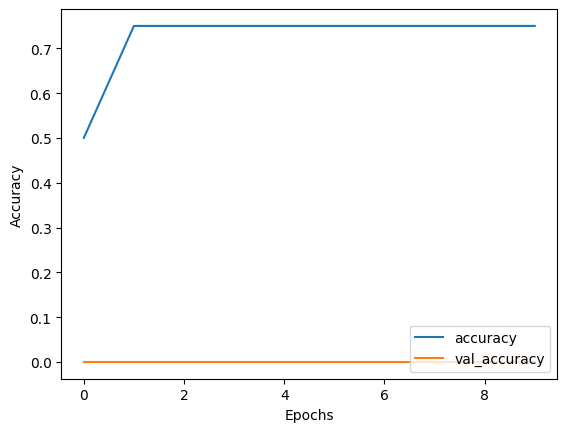

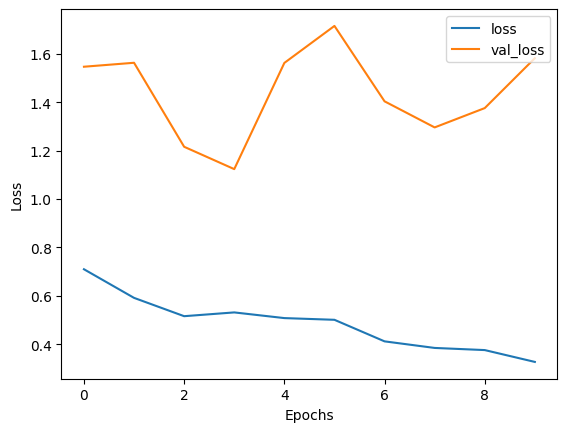

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Prediction (0: Normal, 1: Disease): Normal


In [4]:
# Step 1: Install Required Libraries
!pip install tensorflow keras matplotlib scikit-learn

# Step 2: Import Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Step 3: Create Sample Dataset (10 placeholder images)
# 5 images with "Normal" label (0) and 5 images with "Disease" label (1)
labels = ["Normal", "Disease", "Normal", "Disease", "Normal",
          "Normal", "Disease", "Normal", "Disease", "Normal"]

# Create random 32x32x3 (RGB) images as placeholders for this dataset
images = np.random.rand(10, 32, 32, 3)  # 10 images, 32x32 pixels, 3 color channels (RGB)

# Convert labels to a numpy array with 0 for Normal and 1 for Disease
labels = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 4: Build the CNN Model
model = Sequential()

# Add a convolutional layer with 32 filters, kernel size 3x3, ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the result to feed into a dense layer
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add the output layer with 1 neuron (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Step 7: Visualize Training Process
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Step 8: Make Predictions
# Use one of the test images for prediction
sample_image = X_test[0]  # Take the first test image
sample_image = np.expand_dims(sample_image, axis=0)  # Expand the dimensions for model input
prediction = model.predict(sample_image)

# Print the prediction result (0: Normal, 1: Disease)
print("Prediction (0: Normal, 1: Disease):", "Disease" if prediction[0][0] > 0.5 else "Normal")

# Step 9: Save and Load the Model (Optional)
# Save the trained model to a file
model.save('skin_disease_model.h5')

# To load the model later:
# loaded_model = tf.keras.models.load_model('skin_disease_model.h5')